# Multiple subplots

So far we have looked at relatively simple `maplotlib` plots.  You might argue, what is the advantage of this over charts produced by my favourite spreadsheet program?  I forgive you for thinking this, but I'd like to point out that even in the simple plots we have generated there are a couple of subtle, but important differences.  The first is that **`matplotlib` code is python code** so its reproducible and verifiable.  Python is easy to share with other people regardless of their budget, location, career stage or software skills. The open workflow is excellent for finding mistakes and refactoring.  Constrast that to spreadsheets that are notoriously opaque.  Secondly, `matplotlib` allows you to **produce high resolution images for publication**.  I can't tell you how frustrating it is to review scientific papers that include [*insert you favourite software vendor*] spreadsheet generated low resolution charts that are blurred and unclear.

The even better news is that there is far more that `matplotlib` has too offer.  We will look at one such feature here: figures that consist of two or more subplots. 

> There are again a number of different ways we can produce multiple subplots.  I will show you several and explain how they work.  All are equally fine to use in practice.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Adding a second subplot

Initially let's have a look at a simple example: a figure that includes two subplots above and below that share an x-axis.  For most purposes I would recommend `plt.subplots()`.  This is a function is a bit like a **factory** that does all of the work for you based on a number of optional parameters you provide.  For example to create two plots above and below that have their own independent x-axes.

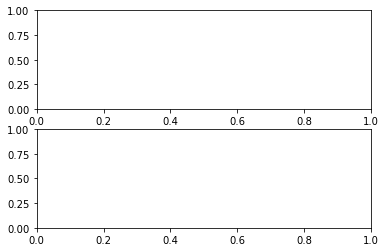

In [59]:
fig, (ax1, ax2) = plt.subplots(nrows=2)

Here we simply set the `nrows` optional parameter to 2 (default=1). Note that `plt.subplots()` returns `fig` and we unpack the second return value to `ax1` and `ax2`.  If we do not unpack (in cases where there are many subplots) the notation `axs` is the convention.  `axs` is a `np.ndarray` 

<class 'numpy.ndarray'>


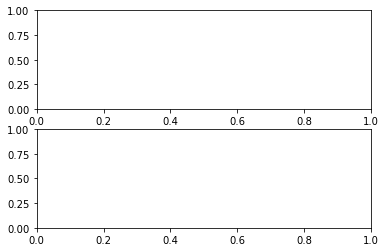

In [65]:
fig, axs = plt.subplots(nrows=2)
print(type(axs))

To force the subplots to share the x-axis we simply pass in the `sharex` bool.`

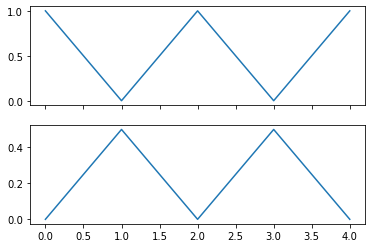

In [82]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
_ = ax1.plot([1, 0, 1, 0, 1])
_ = ax2.plot([0, 0.5, 0, 0.5, 0])

To switch to columns instead of rows we can use the `ncols` optional parameter.  If we want each subplot to share the y axes use `sharey=True`

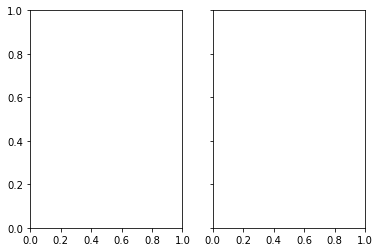

In [95]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

## 3 or more subplots

The optional parameters `nrows` and `ncols` make it easy to create a grid of subplots within a figure. At this stage I would also recommend setting a layout argument.  Two useful ones are `constrained_layout` and `tight_layout`.  These are both bool arguments.

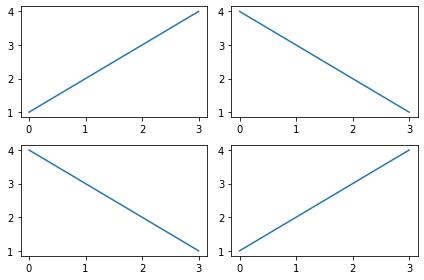

In [117]:
# try swapping tight_layout for constrained_layout=True and also omitting it.
fig, axs = plt.subplots(nrows=2, ncols=2, tight_layout=True, figsize=(6,4))

# note that axs is a 2D array
_ = axs[0][0].plot([1, 2, 3, 4])
_ = axs[0][1].plot([4, 3, 2, 1])
_ = axs[1][0].plot([4, 3, 2, 1])
_ = axs[1][1].plot([1, 2, 3, 4])

There may also be use cases where you need the subplots to be sized differently.  For example two rows of subplots where the top row is a quarter of the size of the bottom row.  The `plt.subplots()` function accepts a `gridspec_kw` dict that allows you to control the height (and width) ratios of plots. 

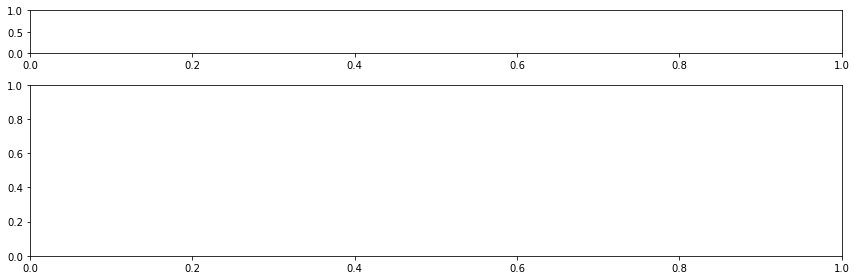

In [177]:
gridspec_kw = {'height_ratios':[1, 4]}
fig, (ax1, ax2) = plt.subplots(nrows=2, tight_layout=True, figsize=(12,4),
                               gridspec_kw=gridspec_kw)

## Understanding the parameters of `add_subplot`

In some scenarios the `plt.subplots()` factory function might not offer quite enough control.  Or you might prefer a more explicit fine grained way to create the different components of your plot. The good news is that `matplotlib` offers incredible control over subplots.  My view is that for newcomers to `matplotlib` this can sometimes be intimidating or (as was my case) may result in you using the controls without fully understanding them!  Let's try to get it right at the beginning.

### Sizing the subplot

We have already seen that to add a subplot we can use:

```python
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot()
```

The `add_subplot` method accepts a number of optional parameters.  For example, we could have expressed the previous coding listing as:

```python
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1, 1, 1)
```

We are now being explicit about the the default values that `.add_subplot` accepts. The three integer parameters are: `nrows`, `ncols`, `index`.  This terminology used is a little confusing at first and I recommend experimenting with the parameters to how it affects the plot.  Let's look at `nrows` and `ncols` first. In essense you are spliting the figure into equal sized rows and columns to control the size of the subplot.

First let's create a figure of size `(3,3)` and create a subplot with he default values `1, 1, 1`

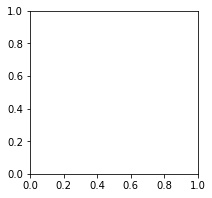

In [8]:
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(1,1,1)

When we use the parameters `(1,1,1)` the subplot fills the full figure.  If we want the subplot to occupy the top third of the figure only, we need to break the figure into three rows by setting `nrows=3`

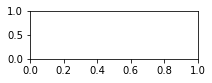

In [85]:
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(3,1,1)

For half we would use `2, 1, 1`

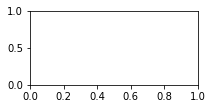

In [87]:
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(2,1,1)

Alternatively if we want the plot to occupy the first vertical third use three columns and set `ncols=3`

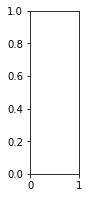

In [127]:
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(1,3,1)

We use also `nrows` and `ncols` simultaneously to limit the width and height of the subplot.  For example, one third of the figure height and one half of the width using `3, 2, 1`:

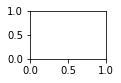

In [30]:
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(3,2,1)

Note that in many `matplotlib` examples you see on line the `,` will be ommitted from the parameters i.e. a shorthand for 

```python
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(3,2,1)
```

is

```python
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(321)
```

Stylistically I prefer the first approach as its much more explicit that there are three parameters as opposed to one three digit integer.  The 'short hand' approach - although seen frequently online - is an approach I try to avoid.=(

## Adding a second subplot

Let's have a look at a simple example: a figure that includes two subplots above and below that share an x-axis. We will also learn how to understand the `index` parameter.

The first thing we will do is divide our figure into 2 rows and place subplot into the first row by setting `index=1`

```python
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(2,1,1)
```

To add a second subplot we simply call `fig.add_subplot()` again.  This time we use `index = 2` and place the 
subplot into the second row. 

```python
ax2 = fig.add_subplot(2,1,2)
```

The full code is below. We will also add some abitrary data.

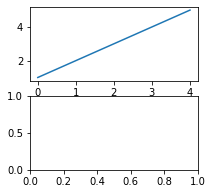

In [156]:
fig = plt.figure(figsize=(3,3))
# we have divided the figure into two rows with this subplot going into row 1
ax1 = fig.add_subplot(2,1,1)
# this subplot is placed into row 2 (index 2)
ax2 = fig.add_subplot(2,1,2)

# test data added to plot 1.
_ = ax1.plot([1, 2, 3, 4, 5])

Note the different x-axes scales. To share the x axis we need to add in `sharex=ax1` to the second `fig.add_subplot` call.

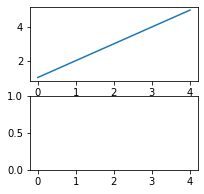

In [163]:
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(2, 1, 1)

# ax2 shares x axis with ax1
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)

_ = ax1.plot([1, 2, 3, 4, 5])

Although the subplots are sharing an x-axis they both show it by default.  We can turn an x-axis off by using the command:
    
```python
ax1.get_xaxis().set_visible(False)
```

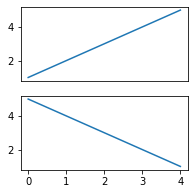

In [162]:
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)

# hide ax1 x axis ticks
ax1.get_xaxis().set_visible(False)

_ = ax1.plot([1, 2, 3, 4, 5])
_ = ax2.plot([5, 4, 3, 2, 1])

Great!  Now let's create a figure with a 2x2 grid of subplots.  We will also share the x and y axis across them.

> Note how we have used `index` in `.add_subplot()` and also how we use `sharex` and `sharey`.

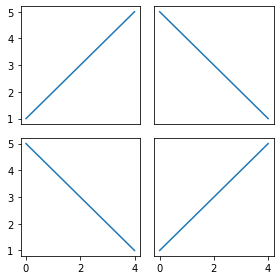

In [176]:
fig = plt.figure(figsize=(4,4), tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharey=ax1)
ax3 = fig.add_subplot(2, 2, 3, sharex=ax1)
ax4 = fig.add_subplot(2, 2, 4, sharex=ax2, sharey=ax3)

# hide axis labels
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

# example data to plot
_ = ax1.plot([1, 2, 3, 4, 5])
_ = ax2.plot([5, 4, 3, 2, 1])
_ = ax3.plot([5, 4, 3, 2, 1])
_ = ax4.plot([1, 2, 3, 4, 5])

### Using a gridspec object

We can also create a `gridspec` object and use it to make our subplots vary in size.   This can get quite detailed and I recommend exploring this in detail in `matplotlib.gridspec` [docs](https://matplotlib.org/stable/tutorials/intermediate/gridspec.html). 

Unlike our **factory** method we don't have ratio commands, but it is still easy to implement.  For example to recreate our factory example with `gridspec_kw` we need to create a grid with 3 rows and 1 column.  We then add a subplot the row at index 0 and a subplot to span rows 1 and 2.  

We add a grid spec of 3 rows and 1 column with this command

```python
gs = fig.add_gridspec(nrows=3, ncols=1)
```

The variable `gs` is of type `matplotlib.gridspec.GridSpec` and can be indexed just like a numpy array.  For example `gs[0]` gives us the first row.  While `gs[1:]` gives us rows at indexes 1 and 2.

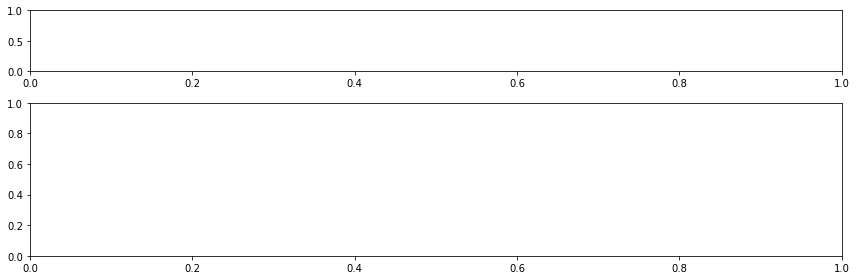

In [189]:
fig = plt.figure(figsize=(12,4), tight_layout=True)
gs = fig.add_gridspec(nrows=3, ncols=1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1:])

Here is a more complicated use of a gridspec.  We have divided the grid up into 3 rows and 2 columns.  In the first column we have two plots. Lets call them plot a and plot b. In the second column we have a single plot c. Plot a spans a single row and a single column. We add that to the figure using the numpy list slicing notation:

```python
# first row, first column only
ax1 = fig.add_subplot(gs[0, 0])
```

Plot b spans a single column, but 2 rows starting from the row at index 1.  So we use the following slicing notation:

```python
# 1: = start at row 1 and span to the last row
# 0 = only the first column (index zero)
ax2 = fig.add_subplot(gs[1:,0])
```

For plot c we want to select the second column (index 1) and span all three rows.

```python
# : = span all rows
# 1 = select the 2nd column only
ax3 = fig.add_subplot(gs[:, 1])
```

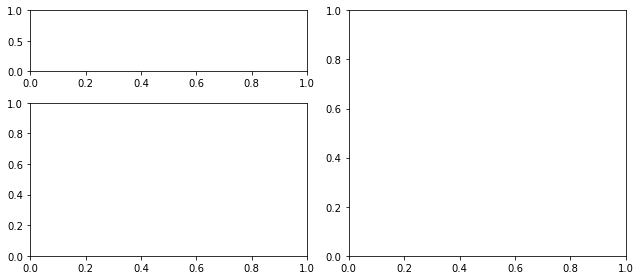

In [200]:
fig = plt.figure(figsize=(9,4), tight_layout=True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1:,0])
# spans two rows:
ax3 = fig.add_subplot(gs[:, 1])

## Summing up

By now you should be able to see the advantages of `matplotlib` for generating your plots.  It is powerful and once you have seen some examples, simple to use.  There's also a few ways you can use it depending on the level of control needed (or preferences).